In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('marketing_AB.csv')

In [22]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [23]:
df = df.drop(columns = 'Unnamed: 0')
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


In [24]:
df["converted"] = np.where(df["converted"]==True, 1, 0)

In [25]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


In [26]:
df.describe(include = 'all')

,user id,test group,converted,total ads,most ads day,most ads hour
count,5.881010e+05,588101,588101.000000,588101.000000,588101,588101.000000
unique,NaN,2,NaN,NaN,7,NaN
top,NaN,ad,NaN,NaN,Friday,NaN
freq,NaN,564577,NaN,NaN,92608,NaN
mean,1.310692e+06,NaN,0.025239,24.820876,NaN,14.469061
std,2.022260e+05,NaN,0.156850,43.715181,NaN,4.834634
min,9.000000e+05,NaN,0.000000,1.000000,NaN,0.000000
25%,1.143190e+06,NaN,0.000000,4.000000,NaN,11.000000
50%,1.313725e+06,NaN,0.000000,13.000000,NaN,14.000000
75%,1.484088e+06,NaN,0.000000,27.000000,NaN,18.000000


test group
ad     564577
psa     23524
Name: count, dtype: int64


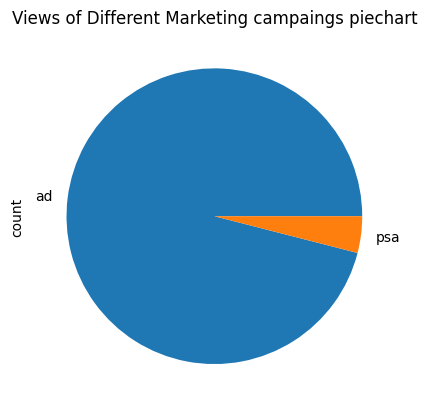

In [28]:
print(df["test group"].value_counts())

ax = df["test group"].value_counts().plot(kind="pie")
ax.set_title('Views of Different Marketing campaings piechart')
plt.show()

% Not converted 97.4761137967798
% Converted 2.523886203220195


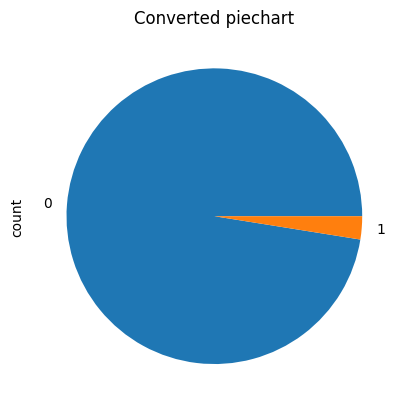

In [29]:
print("% Not converted", 100 * df["converted"].value_counts()[0]/df["converted"].value_counts().sum())
print("% Converted", 100 * df["converted"].value_counts()[1]/df["converted"].value_counts().sum())

ax = df["converted"].value_counts().plot(kind="pie")
ax.set_title('Converted piechart')
plt.show()

In [30]:
df.groupby("test group")["converted"].mean()*100

test group
ad     2.554656
psa    1.785411
Name: converted, dtype: float64

converted        0      1
test group               
ad          550154  14423
psa          23104    420


<Axes: xlabel='test group'>

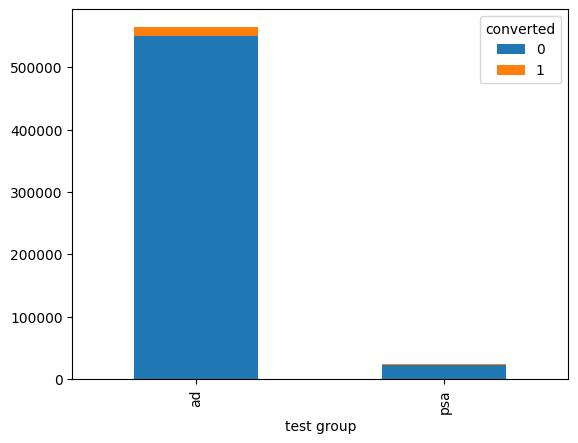

In [31]:
print(df.groupby("converted")["test group"].value_counts().unstack('converted'))

df.groupby("converted")["test group"].value_counts().unstack('converted').plot(kind="bar", stacked=True)

converted  test group
0          psa           23104
1          psa             420
Name: count, dtype: int64


<Axes: xlabel='converted,test group'>

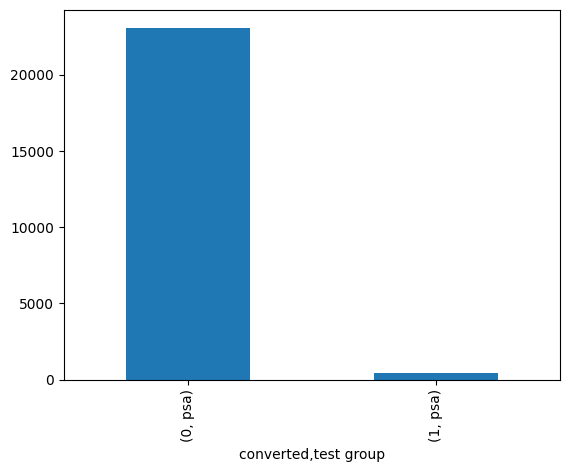

In [33]:
print(df.loc[df["test group"]=="psa"].groupby("converted")["test group"].value_counts())
df.loc[df["test group"]=="psa"].groupby("converted")["test group"].value_counts().plot(kind="bar", stacked=True)

converted  test group
0          ad            550154
1          ad             14423
Name: count, dtype: int64


<Axes: xlabel='converted,test group'>

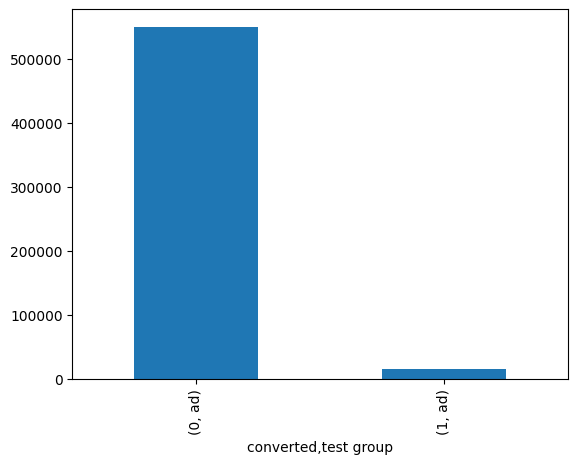

In [34]:
print(df.loc[df["test group"]=="ad"].groupby("converted")["test group"].value_counts())
df.loc[df["test group"]=="ad"].groupby("converted")["test group"].value_counts().plot(kind="bar", stacked=True)

most ads day
Friday       2057
Monday       2857
Saturday     1719
Sunday       2090
Thursday     1790
Tuesday      2312
Wednesday    2018
Name: converted, dtype: int32


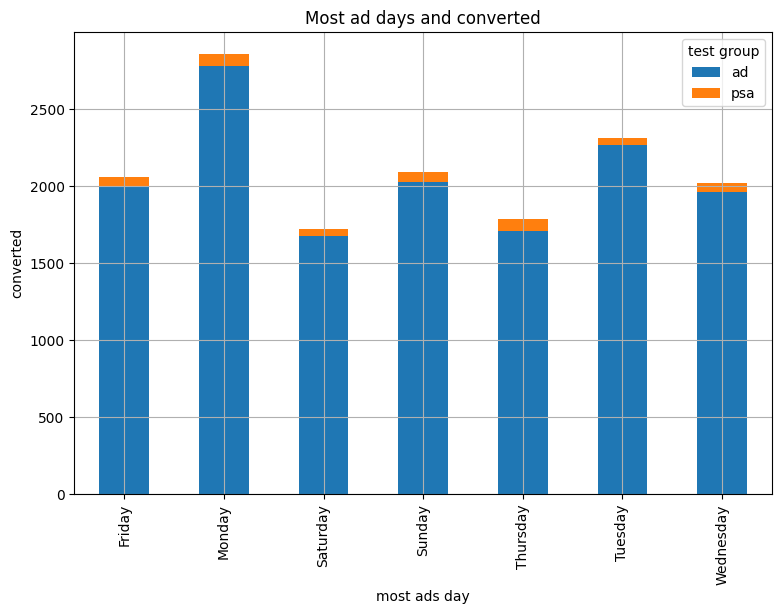

In [35]:
print(df.groupby("most ads day")["converted"].sum())

ax =df.groupby(by =['most ads day', 'test group']).sum()['converted'].unstack('test group').plot(kind='bar', figsize=(9,6), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

most ads day
Friday       1995
Monday       2778
Saturday     1679
Sunday       2027
Thursday     1711
Tuesday      2270
Wednesday    1963
Name: converted, dtype: int32


<Axes: xlabel='most ads day'>

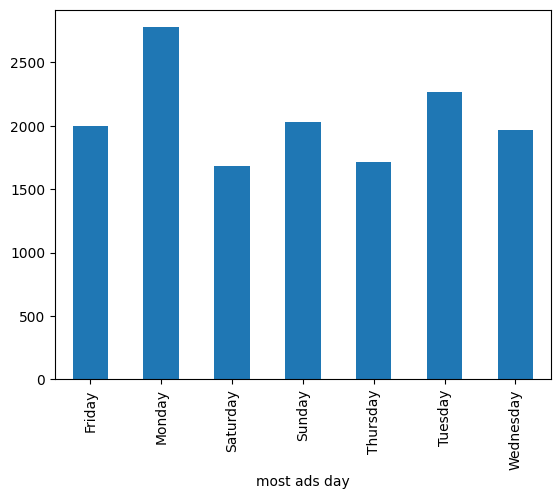

In [37]:
print(df.loc[df["test group"]=="ad"].groupby("most ads day")["converted"].sum())
df.loc[df["test group"]=="ad"].groupby("most ads day")["converted"].sum().plot(kind="bar")

In [40]:
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,0,130,Monday,20
1,1119715,ad,0,93,Tuesday,22
2,1144181,ad,0,21,Tuesday,18
3,1435133,ad,0,355,Tuesday,10
4,1015700,ad,0,276,Friday,14


most ads day
Friday       62
Monday       79
Saturday     40
Sunday       63
Thursday     79
Tuesday      42
Wednesday    55
Name: converted, dtype: int32


<Axes: xlabel='most ads day'>

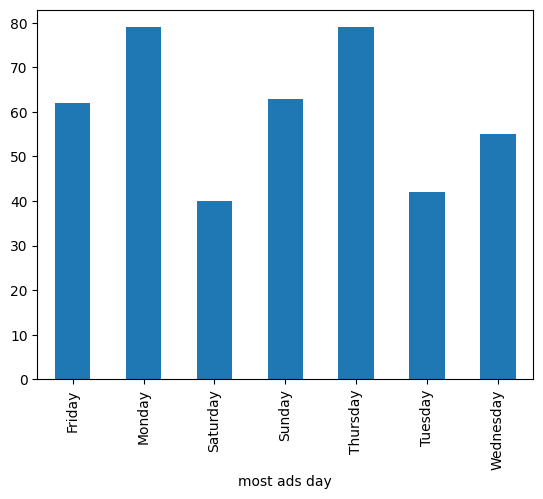

In [41]:
print(df.loc[df['test group'] == 'psa'].groupby('most ads day')['converted'].sum())
df.loc[df['test group'] == 'psa'].groupby('most ads day')['converted'].sum().plot(kind='bar')

most ads hour
0      102
1       62
2       39
3       28
4       11
5       16
6       46
7      116
8      344
9      595
10     838
11    1022
12    1127
13    1176
14    1281
15    1325
16    1156
17     987
18     885
19     811
20     862
21     867
22     690
23     457
Name: converted, dtype: int32


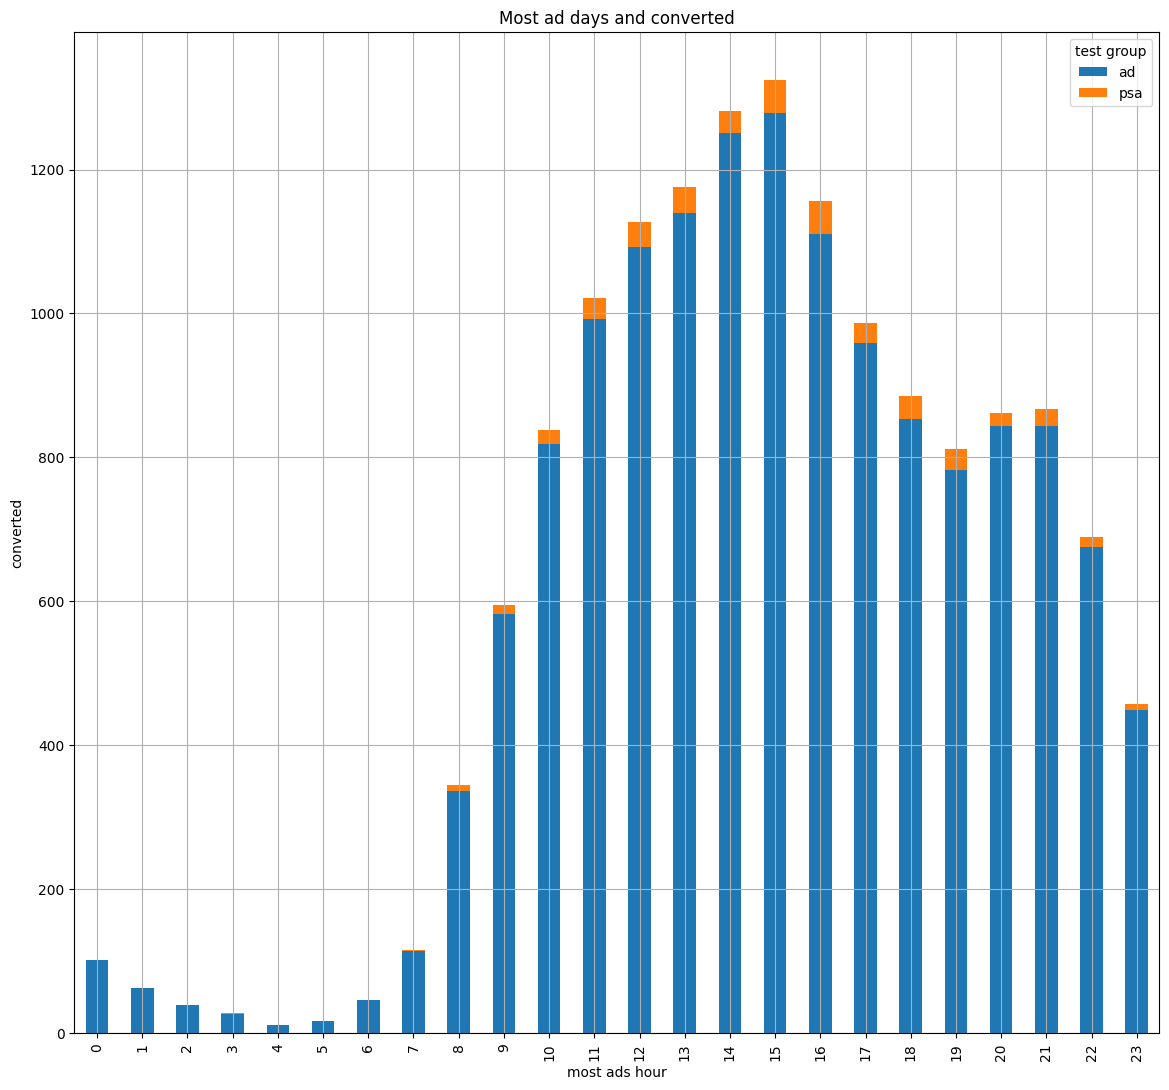

In [45]:
print(df.groupby("most ads hour")["converted"].sum())

ax = df.groupby(by =['most ads hour', 'test group'])['converted'].sum().unstack('test group').plot(kind= 'bar', figsize= (14,13), grid= True, stacked= True)
ax.set_ylabel('converted')
ax.set_title('Most ad days and converted')
plt.show()

In [49]:
ad_dist = df[df['test group'] == 'ad'].reset_index(drop=True)
psa_dist = df[df['test group'] == 'psa'].reset_index(drop=True)

In [50]:
ad_dist.shape, psa_dist.shape

((564577, 6), (23524, 6))

In [51]:
from scipy.stats import shapiro, levene, mannwhitneyu, ttest_ind

In [54]:
_, pvalue_ad = shapiro(ad_dist.converted)
_, pvalue_psa = shapiro(psa_dist.converted)
print(pvalue_ad, pvalue_psa)

0.0 0.0


In [55]:
levene(psa_dist.converted, ad_dist.converted)

LeveneResult(statistic=54.322884225785735, pvalue=1.703305262368155e-13)

In [56]:
ttest_ind(psa_dist.converted, ad_dist.converted)

Ttest_indResult(statistic=-7.37040597428566, pvalue=1.7033052627831264e-13)

In [57]:
# reject null hypothesis

In [58]:
converts_psa = psa_dist.groupby('converted')['user id'].count()
converts_ad = ad_dist.groupby('converted')['user id'].count()
(100 * converts_psa[1]/converts_psa[0]), (100 * converts_ad[1]/converts_ad[0])

(1.8178670360110802, 2.6216295800812137)

In [61]:
# The ad group achieved a higher conversion rate of 2.62% compared 
# to the PSA group's 1.81%. This indicates that the 
# ad campaign was more effective in driving conversions 
# compared to the PSA.